In [30]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

%matplotlib inline
import matplotlib.pyplot as plt
from Fungsi import sigmoid

## Generate Data

### Data Cakno

In [31]:
# Tinggi badan
x1 = np.array([18 + np.random.randn() for i in range(1, 100)])

# Berat badan
x2 = np.array([5 + np.random.randn() for i in range(1, 100)])

# Status Cakno
y1 = np.array([1 for i in range(1, 100)])

# Status Cakni
y2 = np.array([0 for i in range(1, 100)])

# Label
label = ["Cakno" for i in range(1, 100)]

# Dict Compilation fata
data_1 = {
    'x1' : x1,
    'x2' : x2,
    'y1' : y1,
    'y2' : y2,
    'label' : label
}

df1 = pd.DataFrame(data=data_1)

In [32]:
print(df1)

           x1        x2  y1  y2  label
0   18.827301  3.657055   1   0  Cakno
1   16.423424  3.791253   1   0  Cakno
2   17.483973  6.012657   1   0  Cakno
3   19.752378  4.289624   1   0  Cakno
4   18.779684  5.724551   1   0  Cakno
..        ...       ...  ..  ..    ...
94  17.985752  4.775935   1   0  Cakno
95  18.415057  4.699073   1   0  Cakno
96  16.678379  4.046217   1   0  Cakno
97  17.328662  4.449916   1   0  Cakno
98  18.610398  4.316651   1   0  Cakno

[99 rows x 5 columns]


### Data Caknii

In [33]:
# Tinggi badan
x1 = np.array([10 + np.random.randn() for i in range(1, 100)])

# Berat badan
x2 = np.array([5 + np.random.randn() for i in range(1, 100)])

# Status Cakno
y1 = np.array([0 for i in range(1, 100)])

# Status Cakni
y2 = np.array([1 for i in range(1, 100)])

# Label
label = ["Cakni" for i in range(1, 100)]

# Dict Compilation fata
data_2 = {
    'x1' : x1,
    'x2' : x2,
    'y1' : y1,
    'y2' : y2,
    'label' : label
}

df2 = pd.DataFrame(data=data_2)

In [34]:
print(df2)

           x1        x2  y1  y2  label
0    9.101628  4.095828   0   1  Cakni
1   10.570126  5.382652   0   1  Cakni
2    8.425232  3.856522   0   1  Cakni
3    8.610736  5.458310   0   1  Cakni
4    9.129693  2.520130   0   1  Cakni
..        ...       ...  ..  ..    ...
94  10.153649  3.191579   0   1  Cakni
95  11.754925  5.007935   0   1  Cakni
96  10.966205  4.499667   0   1  Cakni
97  11.628220  7.708904   0   1  Cakni
98  10.542478  5.269307   0   1  Cakni

[99 rows x 5 columns]


## Concatenate DataFrames

In [35]:
data_frame = pd.concat([df1, df2])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True, drop=True)

In [36]:
print(data_frame)

            x1        x2  y1  y2  label
0     9.587686  6.452730   0   1  Cakni
1     9.789216  6.069599   0   1  Cakni
2    10.178394  2.642210   0   1  Cakni
3    16.586163  4.825150   1   0  Cakno
4    17.237613  5.101316   1   0  Cakno
..         ...       ...  ..  ..    ...
193  11.077923  5.139444   0   1  Cakni
194  18.199181  4.129789   1   0  Cakno
195  17.403668  4.965294   1   0  Cakno
196  10.029962  4.829816   0   1  Cakni
197  17.737015  3.955066   1   0  Cakno

[198 rows x 5 columns]


### Showing the data    

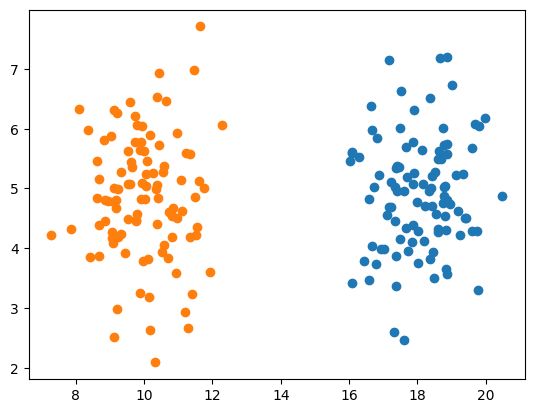

In [37]:
plt.scatter(df1.x1,df1.x2)
plt.scatter(df2.x1,df2.x2)
plt.show()

# Neural Network 

### 1. Matriks Weight

In [38]:
w11 = np.random.uniform(-0.01, 0.01)
w12 = np.random.uniform(-0.01, 0.01)
w21 = np.random.uniform(-0.01, 0.01)
w22 = np.random.uniform(-0.01, 0.01)

W = np.array([[w11, w12], [w21, w22]])

In [39]:
print(W)

[[-0.00101301  0.00654046]
 [-0.00082342  0.00466027]]


### 2. Iterasi Neural Networknya

In [40]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2, len(data_frame))) # Initialize error array to all zeros
for index, baris in data_frame.iterrows():
    # print(index)
    # print(baris)
    W_lama = W
    input = np.array([[baris.x1], [baris.x2]])
    output_hidden = np.dot(W_lama, input)
    output_learn = sigmoid(output_hidden)
    output_actual = np.array([[baris.y1], [baris.y2]])

    # Error Relative
    error = output_actual - output_learn

    delta_W = np.dot(learning_rate * error * output_learn * (1 - output_learn), input.T)

    # print(delta_W)

    W_baru = W_lama + delta_W
    W = W_baru

    error_array[:, index] = error.T * error.T
    
    # Printint
    tebakan = np.argmax(output_learn)
    jawaban = np.argmax(output_actual)

    label_tebakan = "Cakno" if tebakan == 1 else "cakni"

    print(f'index = {index}, tebakan = {label_tebakan}, jawaban = {baris.label}')

    if tebakan == jawaban:
        answer.append(1)
    else:
        answer.append(0)

index = 0, tebakan = cakni, jawaban = Cakni
index = 1, tebakan = Cakno, jawaban = Cakni
index = 2, tebakan = Cakno, jawaban = Cakni
index = 3, tebakan = Cakno, jawaban = Cakno
index = 4, tebakan = Cakno, jawaban = Cakno
index = 5, tebakan = cakni, jawaban = Cakni
index = 6, tebakan = Cakno, jawaban = Cakni
index = 7, tebakan = Cakno, jawaban = Cakno
index = 8, tebakan = Cakno, jawaban = Cakni
index = 9, tebakan = Cakno, jawaban = Cakni
index = 10, tebakan = Cakno, jawaban = Cakno
index = 11, tebakan = Cakno, jawaban = Cakni
index = 12, tebakan = Cakno, jawaban = Cakno
index = 13, tebakan = cakni, jawaban = Cakno
index = 14, tebakan = cakni, jawaban = Cakni
index = 15, tebakan = cakni, jawaban = Cakni
index = 16, tebakan = cakni, jawaban = Cakni
index = 17, tebakan = Cakno, jawaban = Cakni
index = 18, tebakan = Cakno, jawaban = Cakni
index = 19, tebakan = Cakno, jawaban = Cakni
index = 20, tebakan = Cakno, jawaban = Cakno
index = 21, tebakan = Cakno, jawaban = Cakni
index = 22, tebakan 

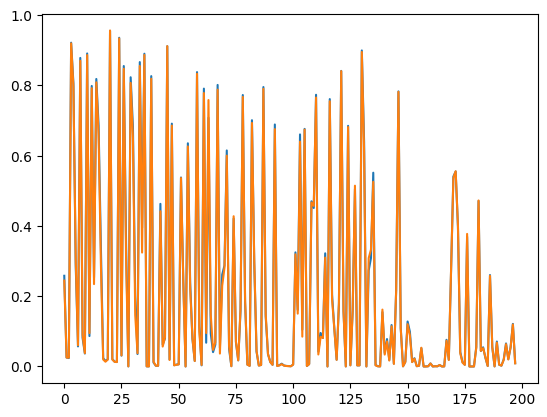

In [41]:
plt.plot(error_array.T);

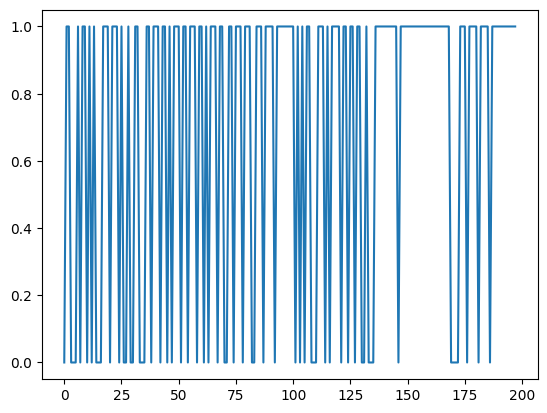

In [42]:
plt.plot(answer)

### Tebakan

In [43]:
# E.g:
x1 = 10
x2 = 8

input = np.array([[x1], [x2]])
output_hidden = np.dot(W, input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)

label_prediction = "Cakno" if prediction == 1 else "cakni"

print(f'tinggi = {x1*10}, berat = {x2*10}, adalah = {label_prediction}')

tinggi = 100, berat = 80, adalah = Cakno
